# vega

[vega](https://github.com/vega/ipyvega) is an extension for the notebook which relies on [Vega](https://github.com/vega/vega).

[documentation](https://vega.github.io/vega-lite/docs/) [source](https://github.com/vega/ipyvega) [installation](https://github.com/vega/ipyvega#python-package-index) [tutorial](https://github.com/vega/ipyvega/tree/master/notebooks) [tutorial js](https://vega.github.io/vega-lite/tutorials/getting_started.html) [gallery](https://github.com/vega/vega-lite) [gallery2](https://vega.github.io/vega-lite/examples/#stacked-and-layered-plots)

In [1]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

## installation

Javascript needs to be installed for Jupyter.

```
pip install jupyter pandas vega
jupyter nbextension install --py vega
jupyter nbextension enable vega --py
```

## example

In [2]:
from vega import Vega

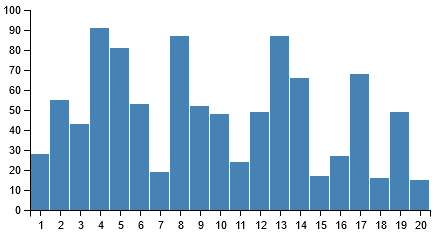

In [11]:
Vega({
  "width": 400,
  "height": 200,
  "padding": {"top": 10, "left": 30, "bottom": 30, "right": 10},
  "data": [
    {
      "name": "table",
      "values": [
        {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
        {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
        {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
        {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
        {"x": 9,  "y": 52}, {"x": 10, "y": 48},
        {"x": 11, "y": 24}, {"x": 12, "y": 49},
        {"x": 13, "y": 87}, {"x": 14, "y": 66},
        {"x": 15, "y": 17}, {"x": 16, "y": 27},
        {"x": 17, "y": 68}, {"x": 18, "y": 16},
        {"x": 19, "y": 49}, {"x": 20, "y": 15}
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "ordinal",
      "range": "width",
      "domain": {"data": "table", "field": "x"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "domain": {"data": "table", "field": "y"},
      "nice": True
    }
  ],
  "axes": [
    {"type": "x", "scale": "x"},
    {"type": "y", "scale": "y"}
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "table"},
      "properties": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "width": {"scale": "x", "band": True, "offset": -1},
          "y": {"scale": "y", "field": "y"},
          "y2": {"scale": "y", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": { "fill": {"value": "red"} } } } ] })

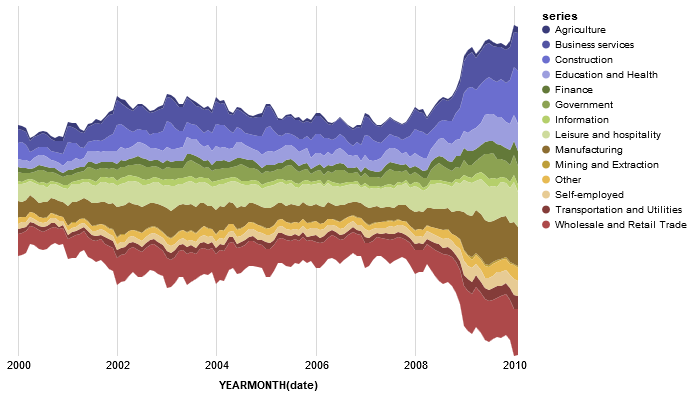

In [8]:
from vega import VegaLite
import json
from io import StringIO
d = json.load(StringIO("""
{
  "data": {"url": "https://vega.github.io/vega-editor/app/data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "scale": {"nice": "month"},
      "axis": {"axisWidth": 0, "format": "%Y", "labelAngle": 0, "tickSize": 0}
    },
    "y": {
      "aggregate": "sum", "field": "count","type": "quantitative",
      "axis": false
    },
    "color": {"field":"series", "type":"nominal", "scale":{"range": "category20b"}}
  },
  "config": {"cell": {"width": 300, "height": 200}, "mark": {"stacked": "center"}}
}
"""))
VegaLite(d)